# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [1]:
# Exercise by Balaje MS Viswanaathan 
import pandas as pd
df = pd.read_csv('petrol.csv')
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [2]:
df

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

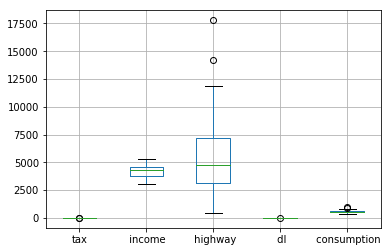

In [64]:
df.boxplot()
# Only the highway column has the outliers 

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)




tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [9]:
IQR1=df < (Q1 - 1.5 * IQR)

In [10]:
IQR2=df > (Q3 + 1.5 * IQR)

In [11]:
print(IQR1)

      tax   income   highway     dl   consumption
0   False    False     False  False         False
1   False    False     False  False         False
2   False    False     False  False         False
3   False    False     False  False         False
4   False    False     False  False         False
5   False    False     False  False         False
6   False    False     False  False         False
7   False    False     False  False         False
8   False    False     False  False         False
9   False    False     False  False         False
10  False    False     False  False         False
11  False    False     False  False         False
12  False    False     False  False         False
13  False    False     False  False         False
14  False    False     False  False         False
15  False    False     False  False         False
16  False    False     False  False         False
17  False    False     False  False         False
18  False    False     False  False         False


In [12]:
print(IQR2)

      tax   income   highway     dl   consumption
0   False    False     False  False         False
1   False    False     False  False         False
2   False    False     False  False         False
3   False    False     False  False         False
4   False    False     False  False         False
5    True    False     False  False         False
6   False    False     False  False         False
7   False    False     False  False         False
8   False    False     False  False         False
9   False    False     False  False         False
10  False    False     False  False         False
11  False    False      True  False         False
12  False    False     False  False         False
13  False    False     False  False         False
14  False    False     False  False         False
15  False    False     False  False         False
16  False    False     False  False         False
17  False    False     False  False         False
18  False    False     False   True          True


In [14]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498
10,8.00,4391,5939,0.530,580


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [15]:
df1.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [32]:
X=df1.iloc[:,[0,1,3]]
#X=df1.iloc[:,[0,1,3]]
Y=df1.iloc[:,-1]

In [33]:
X

,tax,income,dl
0,9.00,3571,0.525
1,9.00,4092,0.572
2,9.00,3865,0.580
3,7.50,4870,0.529
4,8.00,4399,0.544
6,8.00,5319,0.451
7,8.00,5126,0.553
8,8.00,4447,0.529
9,7.00,4512,0.552
10,8.00,4391,0.530


In [34]:
Y

0     541
1     524
2     561
3     414
4     410
6     344
7     467
8     464
9     498
10    580
12    525
13    508
14    566
15    635
16    603
17    714
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
37    704
38    648
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name:  consumption, dtype: int64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)




In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(34, 3)
(34,)
(9, 3)
(9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_train_pred = regressor.predict(X_train)
Y_pred = regressor.predict(X_test)
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 610.5468761108597
Coefficients: 
 [-3.51358042e+01 -6.93071139e-02  9.18082513e+02]


In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 610.5468761108597
Coefficients: 
 [-3.51358042e+01 -6.93071139e-02  9.18082513e+02]


In [39]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X_train) # adding a constant
model = sm.OLS(Y_train, X).fit()
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     21.76
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.11e-07
Time:                        15:10:19   Log-Likelihood:                -180.67
No. Observations:                  34   AIC:                             369.3
Df Residuals:                      30   BIC:                             375.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        610.5469    182.524      3.345      0.0

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [40]:
model.rsquared

0.6851695621722732

In [108]:
import numpy as np
import seaborn as sns
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#print('MAE:', metrics.mean_absolute_error(Y_train, Y_train_pred))
#print('MSE:', metrics.mean_squared_error(Y_train, Y_train_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))

('MAE:', 43.518257436052096)
('MSE:', 2978.5510062089575)
('RMSE:', 54.576102885868991)


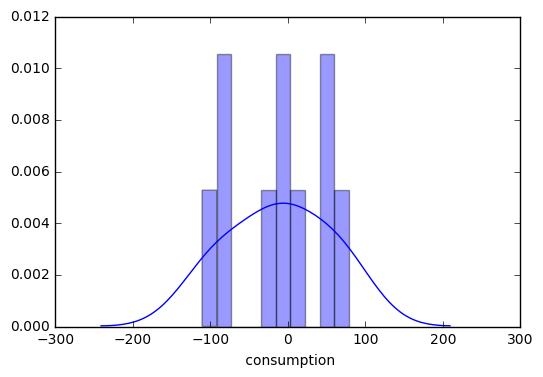

In [63]:
sns.distplot((Y_test-Y_pred),bins=10);

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [49]:
X1=df1.iloc[:,[0,1,2,3]]
X1
#X=df1.iloc[:,[0,1,3]]
Y1=df1.iloc[:,-1]

,tax,income,highway,dl
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552
10,8.00,4391,5939,0.530


In [51]:
Y1=df1.iloc[:,-1]
Y1

0     541
1     524
2     561
3     414
4     410
6     344
7     467
8     464
9     498
10    580
12    525
13    508
14    566
15    635
16    603
17    714
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
37    704
38    648
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name:  consumption, dtype: int64

# Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.


In [52]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size = 0.2, random_state = 0)

In [53]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(34, 4)
(34,)
(9, 4)
(9,)


# Build Model¶
#Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_train_pred = regressor.predict(X_train)
Y_pred = regressor.predict(X_test)
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 701.203654386948
Coefficients: 
 [-4.12644887e+01 -6.96187392e-02 -3.75300044e-03  8.80072361e+02]


In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 701.203654386948
Coefficients: 
 [-4.12644887e+01 -6.96187392e-02 -3.75300044e-03  8.80072361e+02]


In [59]:
import statsmodels.api as sm
# with statsmodels
X1 = sm.add_constant(X_train) # adding a constant
model = sm.OLS(Y_train, X1).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     16.72
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           3.28e-07
Time:                        15:46:45   Log-Likelihood:                -179.99
No. Observations:                  34   AIC:                             370.0
Df Residuals:                      29   BIC:                             377.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        701.2037    200.149      3.503      0.0

In [60]:
model.rsquared

0.6975102297976898

In [62]:
import numpy as np
import seaborn as sns
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



MAE: 43.17520221403265
MSE: 3343.350041515741
RMSE: 57.82170908504643


C:\Users\BALAJI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


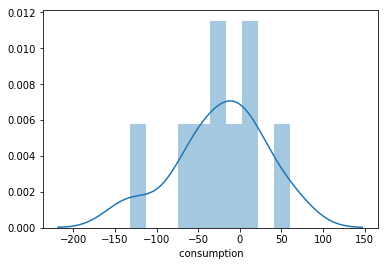

In [63]:
sns.distplot((Y_test-Y_pred),bins=10);

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     16.72
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           3.28e-07
Time:                        15:48:22   Log-Likelihood:                -179.99
No. Observations:                  34   AIC:                             370.0
Df Residuals:                      29   BIC:                             377.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        701.2037    200.149      3.503      0.002     291.854    1110.554
tax          -41.2645     12.813     -3.221      0.003     -67.469     -15.060
 income       -0.0696      0.016     -4.232      0.000      -0.103      -0.036
 highway      -0.0038      0.003     -1.088      0.286      -0.011       0.003
 dl          880.0724    183.188      4.804      0.000     505.410    1254.735
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.395
Skew:                           0.468   Prob(JB):                        0.498
Kurtosis:                       2.670   Cond. No.                     2.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 9: Print the coefficients of the multilinear regression model

In [50]:
print('Coefficients: \n', regressor.coef_)

('Coefficients: \n', array([ -2.93087031e+01,  -7.08395205e-02,   1.43056503e+03]))


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
From the observation 


If we increase the independent variable (0,1,2,3,4) We see a sigficant highvalue in the R-squared - 0.698
   we decrease the independent variable (0,1,3)  We see a R-squared - 0.685 which is dropped 
    
